1. General Overview: Tổng quan chung về dữ liệu

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
df = pd.read_csv('cleveland.csv', header=None)
# Do data chưa có hàng về tên của các cột nên em tiến hành thêm tên của các cột vào để phân tích.
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
# Cột target đại diện cho đối tượng đấy có bị bệnh tim hay không, em sẽ chuyển để về 0 là không bị bệnh tim và 1 là bị bệnh tim.
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
# Kiểm tra dữ liệu có bị thiếu không, và điền thông tin vào các ô thiếu.
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [7]:
# Tính toán thống kê mô tả
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
description = df.describe()
print(description)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

1.1 Phân tích thống kê mô tả

-Tuổi (age): Tuổi trung bình của các bệnh nhân là khoảng 54 tuổi. Điều này cho thấy rằng bệnh tim có thể phổ biến hơn ở những người trung niên và người cao tuổi.

-Giới tính (sex): Giá trị trung bình của cột sex là khoảng 0.68, cho thấy rằng phần lớn các bệnh nhân trong dữ liệu là nam giới (giá trị 1 đại diện cho nam, 0 đại diện cho nữ).

-Loại đau ngực (cp): Loại đau ngực phổ biến nhất là loại 4 (giá trị trung bình gần 3). Điều này có thể cho thấy rằng loại đau ngực này có liên quan mạnh đến bệnh tim.

-Huyết áp khi nghỉ ngơi (trestbps): Huyết áp trung bình khi nghỉ ngơi là khoảng 131 mmHg. Điều này cho thấy rằng nhiều bệnh nhân có huyết áp cao, một yếu tố nguy cơ của bệnh tim.

-Cholesterol (chol): Mức cholesterol trung bình là khoảng 246 mg/dl, cho thấy rằng nhiều bệnh nhân có mức cholesterol cao, một yếu tố nguy cơ của bệnh tim.

-Đường huyết lúc đói (fbs): Giá trị trung bình của cột fbs là khoảng 0.15, cho thấy rằng phần lớn các bệnh nhân không có mức đường huyết lúc đói cao (giá trị 1 đại diện cho mức đường huyết lúc đói > 120 mg/dl).

-Nhịp tim tối đa đạt được (thalach): Nhịp tim tối đa trung bình đạt được là khoảng 149 bpm. Điều này cho thấy rằng nhịp tim tối đa có thể là một yếu tố quan trọng trong việc xác định nguy cơ mắc bệnh tim.

-Bài tập gây đau ngực (exang): Giá trị trung bình của cột exang là khoảng 0.33, cho thấy rằng một số bệnh nhân trải qua đau ngực khi tập thể dục.

-ST depression (oldpeak): Giá trị trung bình của cột oldpeak là khoảng 1.04, cho thấy rằng nhiều bệnh nhân có mức độ giảm ST khi tập thể dục so với khi nghỉ ngơi.

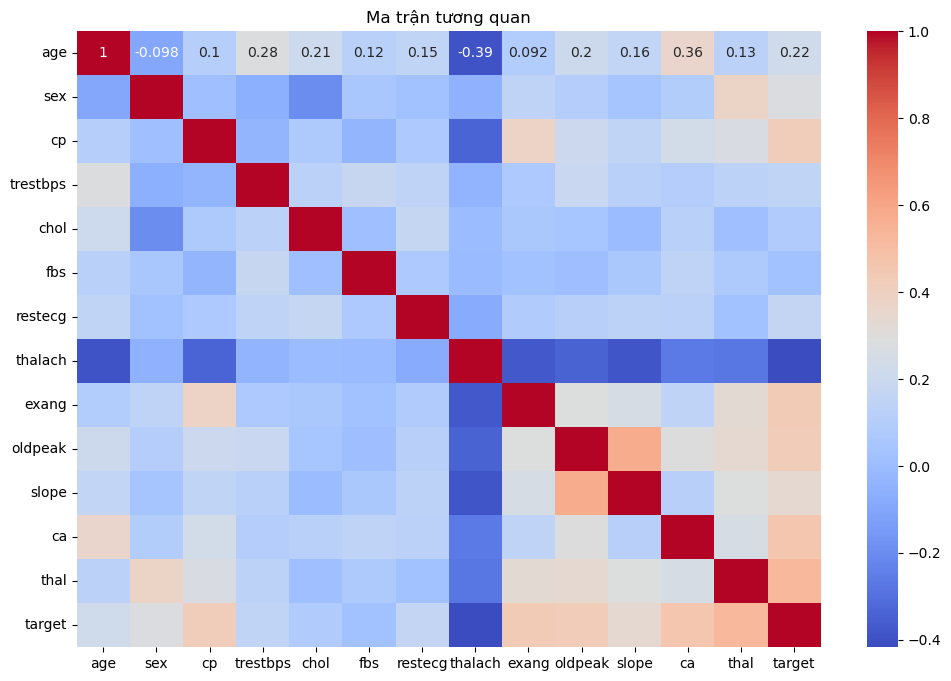

In [8]:
# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

1.2 Từ ma trận tương quan ta có thể thấy

Tuổi (age): Tuổi có tương quan dương với khả năng mắc bệnh tim, cho thấy rằng nguy cơ mắc bệnh tim tăng lên theo tuổi.

Giới tính (sex): Giới tính có tương quan dương với khả năng mắc bệnh tim, cho thấy rằng nam giới có nguy cơ mắc bệnh tim cao hơn so với nữ giới.

Loại đau ngực (cp): Loại đau ngực có tương quan dương mạnh với khả năng mắc bệnh tim, cho thấy rằng loại đau ngực là một yếu tố quan trọng trong việc xác định nguy cơ mắc bệnh tim.

Huyết áp khi nghỉ ngơi (trestbps):Huyết áp khi nghỉ ngơi có tương quan dương với khả năng mắc bệnh tim, cho thấy rằng huyết áp cao là một yếu tố nguy cơ của bệnh tim.

Cholesterol (chol): Mức cholesterol có tương quan dương với khả năng mắc bệnh tim, cho thấy rằng mức cholesterol cao là một yếu tố nguy cơ của bệnh tim.

Nhịp tim tối đa đạt được (thalach): Nhịp tim tối đa đạt được có tương quan âm với khả năng mắc bệnh tim, cho thấy rằng nhịp tim tối đa thấp có thể là một yếu tố nguy cơ của bệnh tim.

Bài tập gây đau ngực (exang): Bài tập gây đau ngực có tương quan dương với khả năng mắc bệnh tim, cho thấy rằng đau ngực khi tập thể dục là một yếu tố nguy cơ của bệnh tim.

2.  Exploratory Data Analysis (EDA) : Thực hiện Phân tích dữ liệu thăm dò (EDA) để có những hiểu biết rõ ràng hơn về dữ liệu

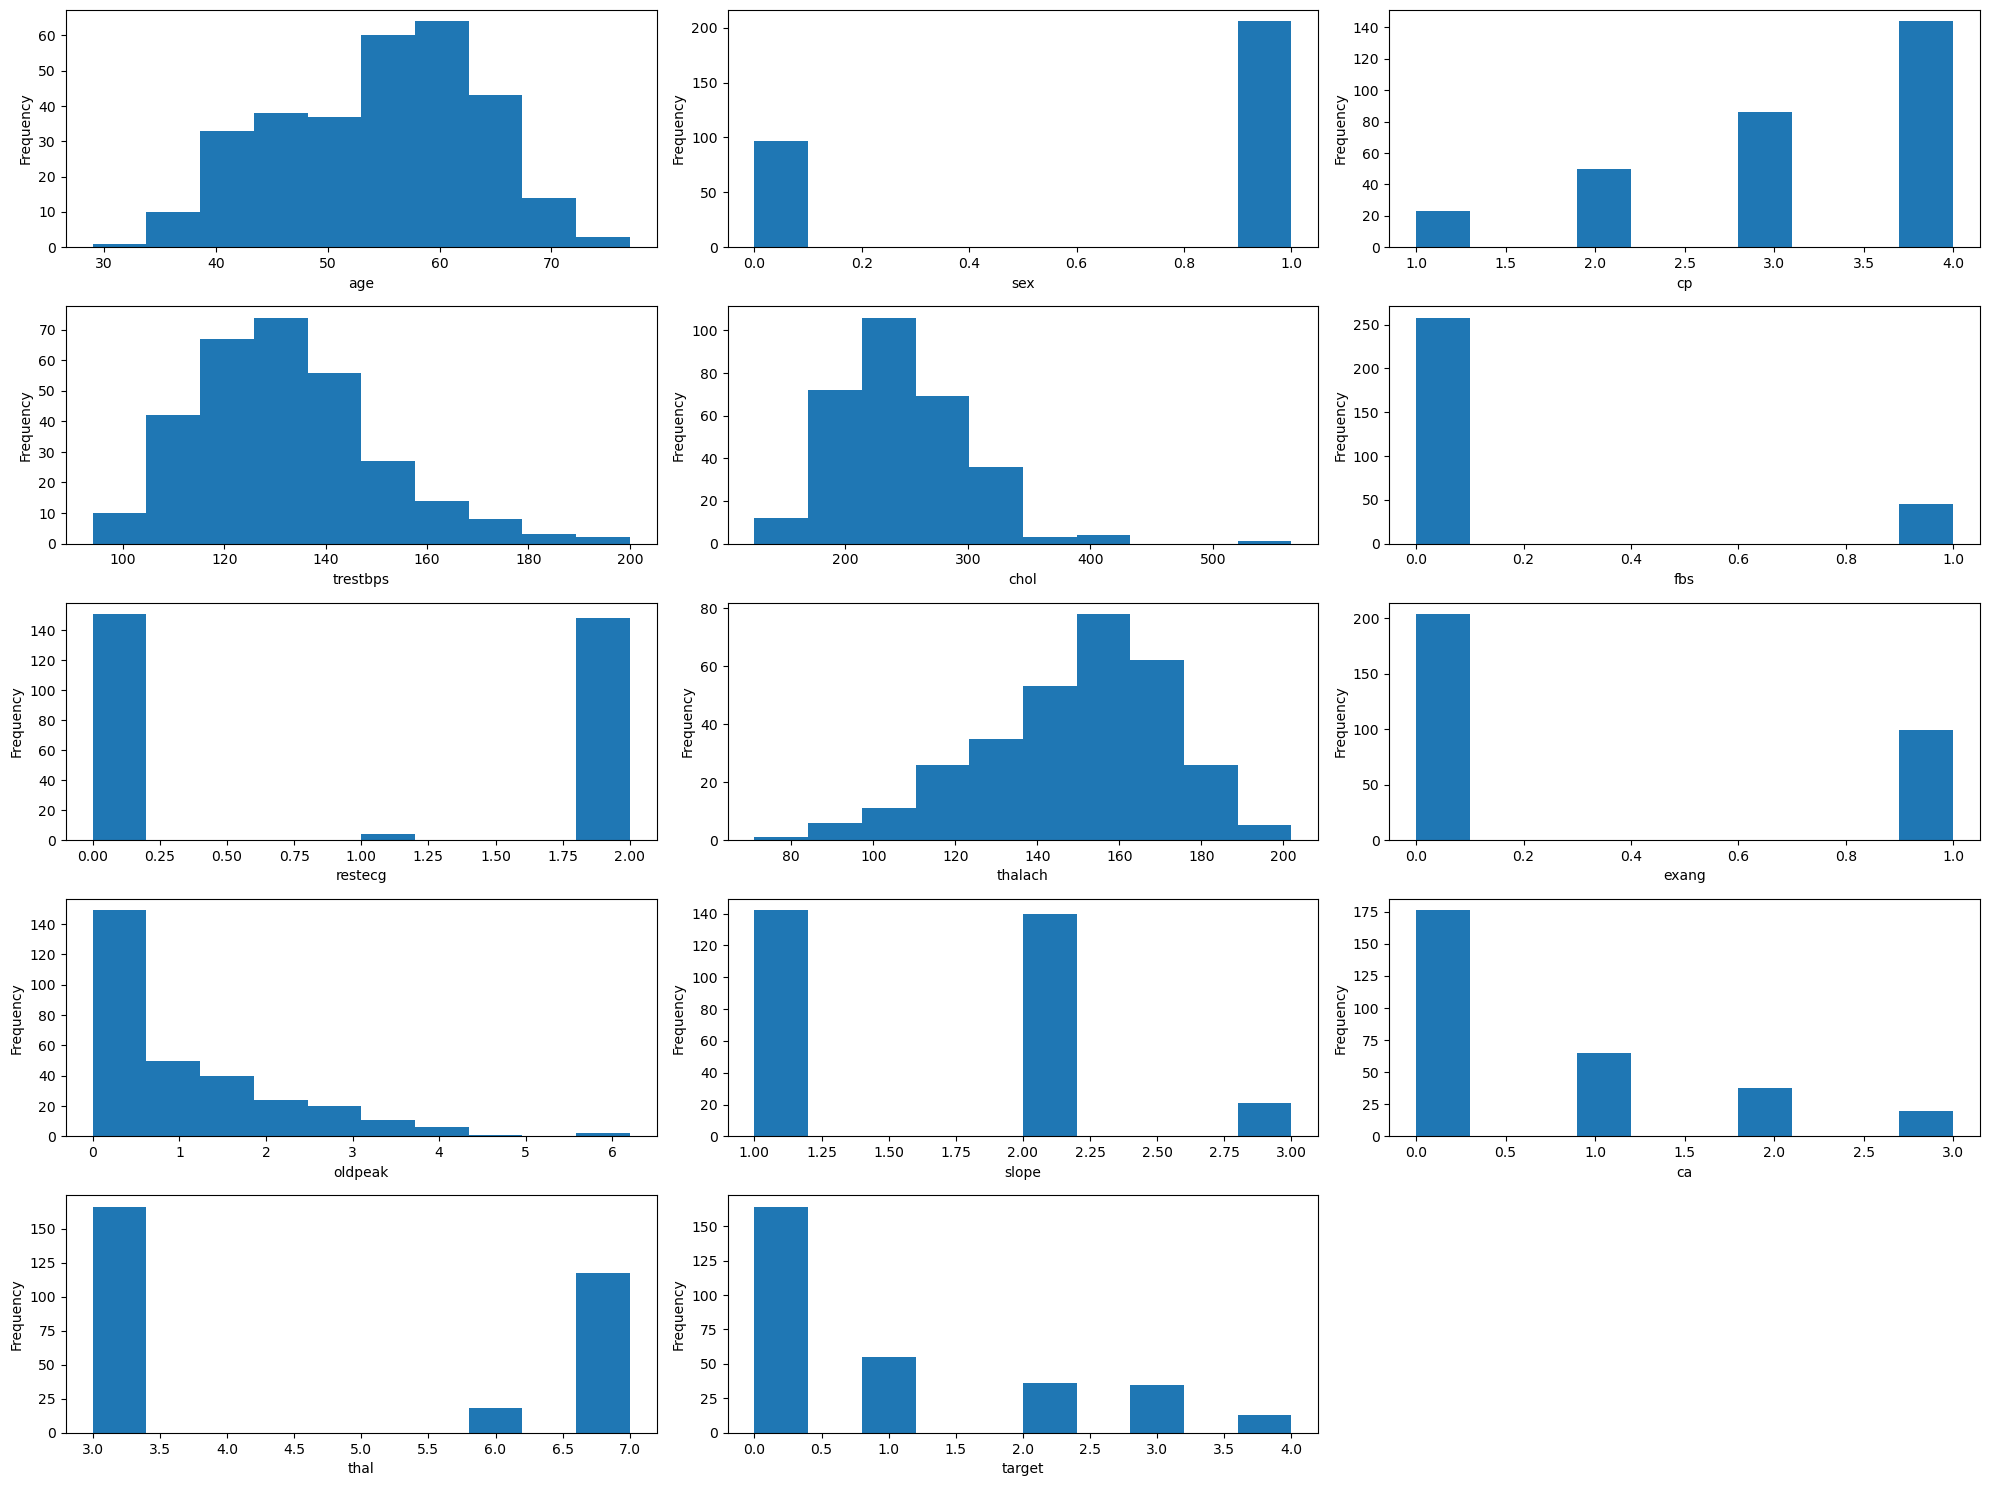

In [9]:
# Đọc dữ liệu từ tệp CSV và gán tên cột
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
fig = plt.figure(figsize=(20, 15))
i = 0
for col in df.columns:
    i += 1
    ax = plt.subplot(5, 3, i)
    df[col].hist(ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # Tắt các đường lưới

plt.tight_layout()
plt.show()

Một vài nhật xét sau khi thấy được chi tiết của từng đặc trưng trong dự liệu .

- Data trên các đối tượng có độ tuổi nằm từ 55-68 tuổi.
- Data trên có số lượng Nam là chủ yếu, chiếm ưu thế so với nữ.
- Loại đau ngực (cp) xuất hiện nhiều nhất là loại 4.
- Phần lớn bệnh nhân có huyết áp khi nghỉ ngơi trong khoảng từ 120 đến 140 mmHg.
- Phần lớn bệnh nhân có mức cholesterol trong khoảng từ 200 đến 300 mg/dl.
- Phần lớn bệnh nhân không có mức đường huyết lúc đói cao (giá trị 1 đại diện cho mức đường huyết lúc đói > 120 mg/dl)
- Phần lớn bệnh nhân có kết quả điện tâm đồ bình thường hoặc có ST-T bất thường
- Phần lớn bệnh nhân có nhịp tim tối đa đạt được trong khoảng từ 140 đến 160 bpm.
- Phần lớn bệnh nhân không trải qua đau ngực khi tập thể dục.
- Phần lớn bệnh nhân có mức độ giảm ST trong khoảng từ 0 đến 2.
- Phần lớn bệnh nhân có độ dốc của đoạn ST là loại 2 hoặc 3.
- Phần lớn bệnh nhân có 0 hoặc 1 mạch chính bị hẹp.
- Phần lớn bệnh nhân có thalassemia loại 3 (bình thường) hoặc loại 7 (đảo ngược).


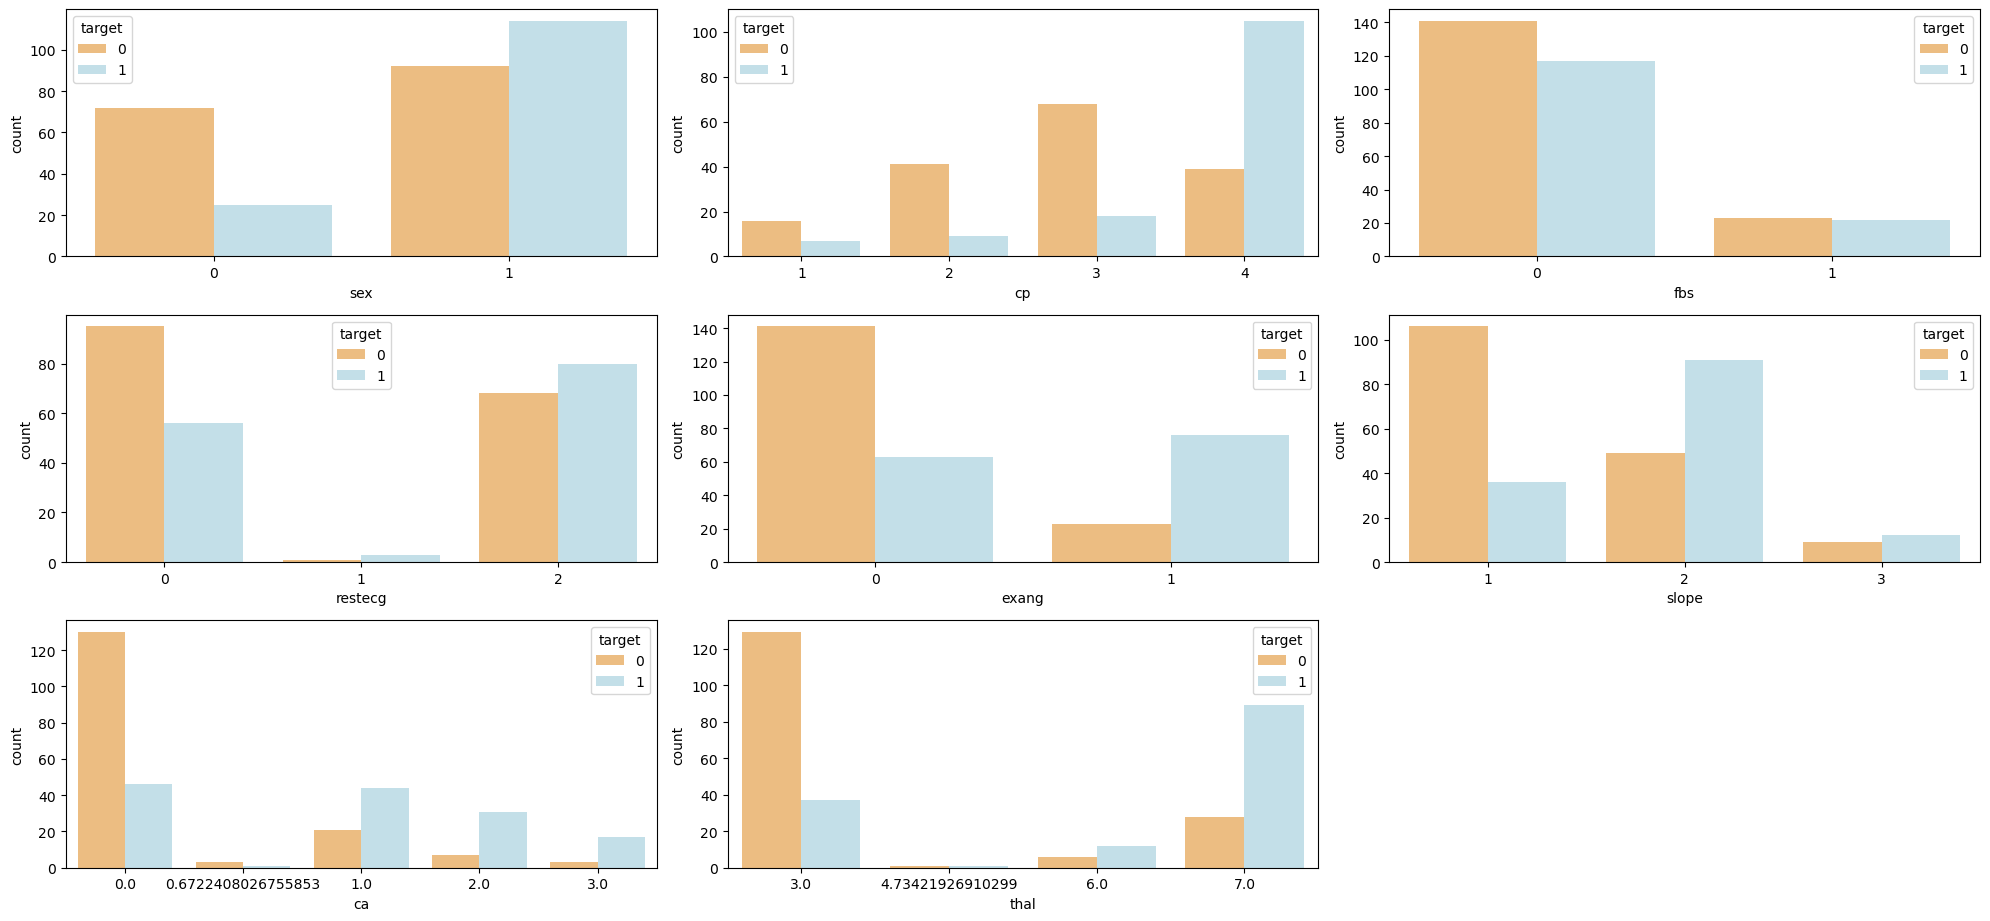

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
# barplot
cast_list = ['sex', 'cp','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Ensure 'target' is treated as a categorical variable
df['target'] = df['target'].astype(str)

fig = plt.figure(figsize=(20, 15))

for i in range(len(cast_list)):
    column = cast_list[i]
    sub = fig.add_subplot(5, 3, i + 1)
    chart = sns.countplot(data=df, x=column, hue='target', palette='RdYlBu')

plt.tight_layout()
plt.show()
    

Ta có thể thấy :

-Nữ có khả năng bị bệnh thấp hơn nam.

-cp 4 có mức độ mắc bệnh tim cao


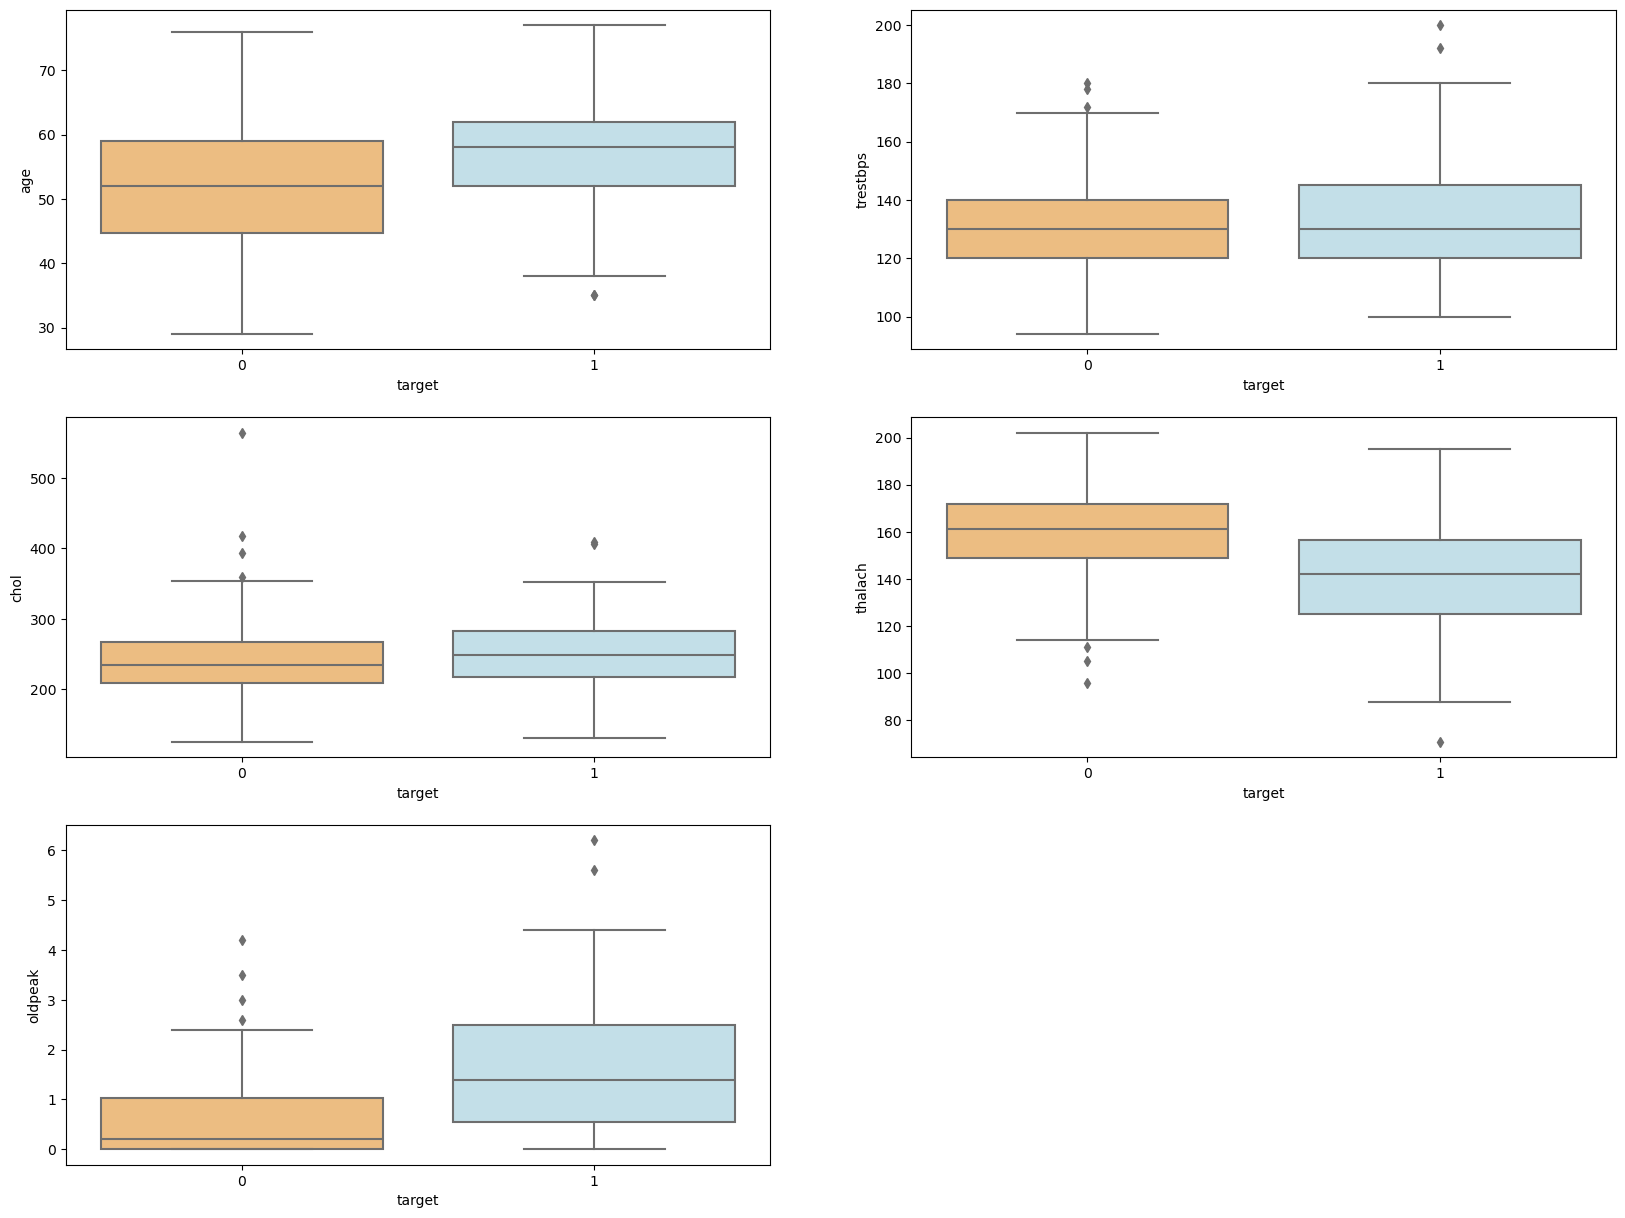

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean()) 
df['ca'] = df.ca.fillna(df.ca.mean())

# boxplot
num_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20, 15))
for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(3, 2, i + 1)
    sns.boxplot(data=df, x='target', y=column, palette='RdYlBu')

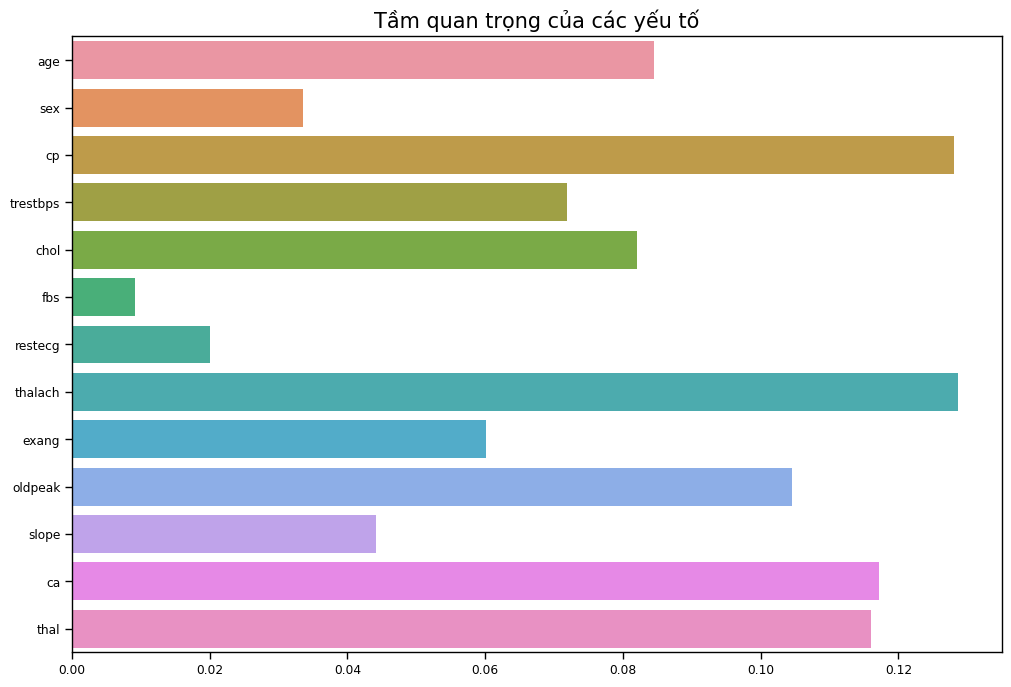

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(df.iloc[:, :-1], df['target'])

# Lấy tầm quan trọng của đặc trưng
feature_importances = rf.feature_importances_

# Vẽ biểu đồ tầm quan trọng của các yếu tố
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=df.columns[:-1])
plt.title('Tầm quan trọng của các yếu tố')
plt.show()

Nhận xét từ biểu đồ tầm quan trọng của đặc trưng

Nhịp tim tối đa đạt được (thalach):  Nhịp tim tối đa đạt được là đặc trưng quan trọng nhất trong việc dự đoán khả năng mắc bệnh tim. Điều này cho thấy rằng nhịp tim tối đa đạt được là một yếu tố quan trọng trong việc xác định nguy cơ mắc bệnh tim.

ST depression (oldpeak):  Mức độ giảm ST khi tập thể dục so với khi nghỉ ngơi là đặc trưng quan trọng thứ hai. Điều này cho thấy rằng mức độ giảm ST là một yếu tố quan trọng trong việc xác định nguy cơ mắc bệnh tim.

Loại đau ngực (cp): Loại đau ngực là đặc trưng quan trọng thứ ba. Điều này cho thấy rằng loại đau ngực mà bệnh nhân trải qua là một yếu tố quan trọng trong việc xác định nguy cơ mắc bệnh tim.

Cholesterol (chol): Mức cholesterol cũng là một đặc trưng quan trọng. Điều này cho thấy rằng mức cholesterol cao là một yếu tố nguy cơ của bệnh tim.

Huyết áp khi nghỉ ngơi (trestbps): Huyết áp khi nghỉ ngơi cũng là một đặc trưng quan trọng. Điều này cho thấy rằng huyết áp cao là một yếu tố nguy cơ của bệnh tim.

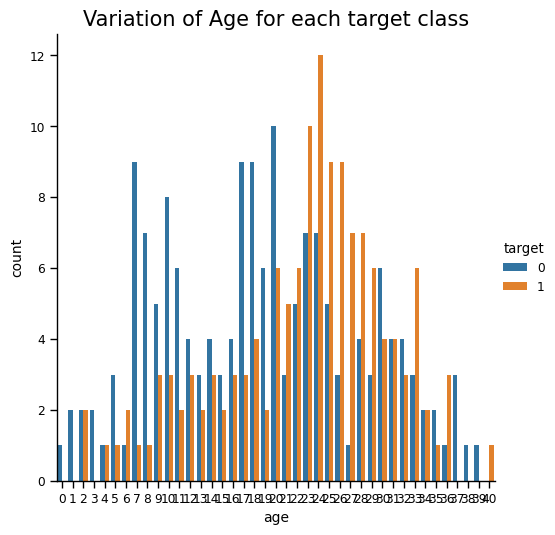

In [ ]:
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Chuyển đổi 'target' thành chuỗi để xử lý đúng cách trong legend
df['target'] = df['target'].astype(str)

# Phân phối của 'target' theo 'age'
sns.set_context("paper", font_scale=1, rc={"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
g = sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique())

# Thiết lập các nhãn trên trục x
g.set_xticklabels(g.ax.get_xticks())

plt.title('Biến thiên của tuổi theo từng lớp mục tiêu')
plt.show()

Từ biểu đồ ta có thế thấy răng độ tuổi ở mức 42-72 có khả năng măc bệnh tim cao hơn so với các độ tuổi còn lại 

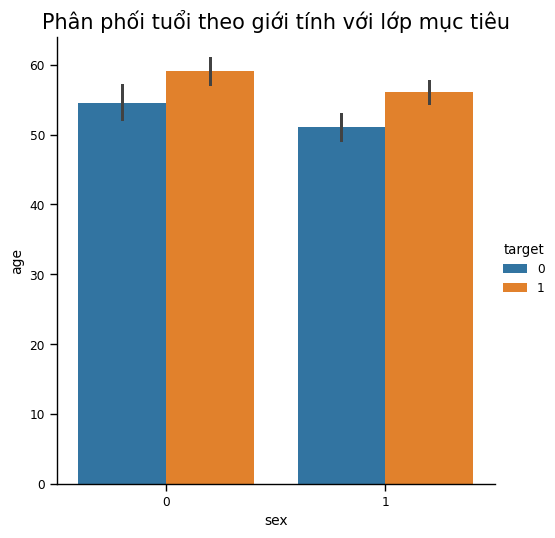

In [27]:

# Biểu đồ cột của tuổi theo giới tính với hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Phân phối tuổi theo giới tính với lớp mục tiêu')
plt.show()

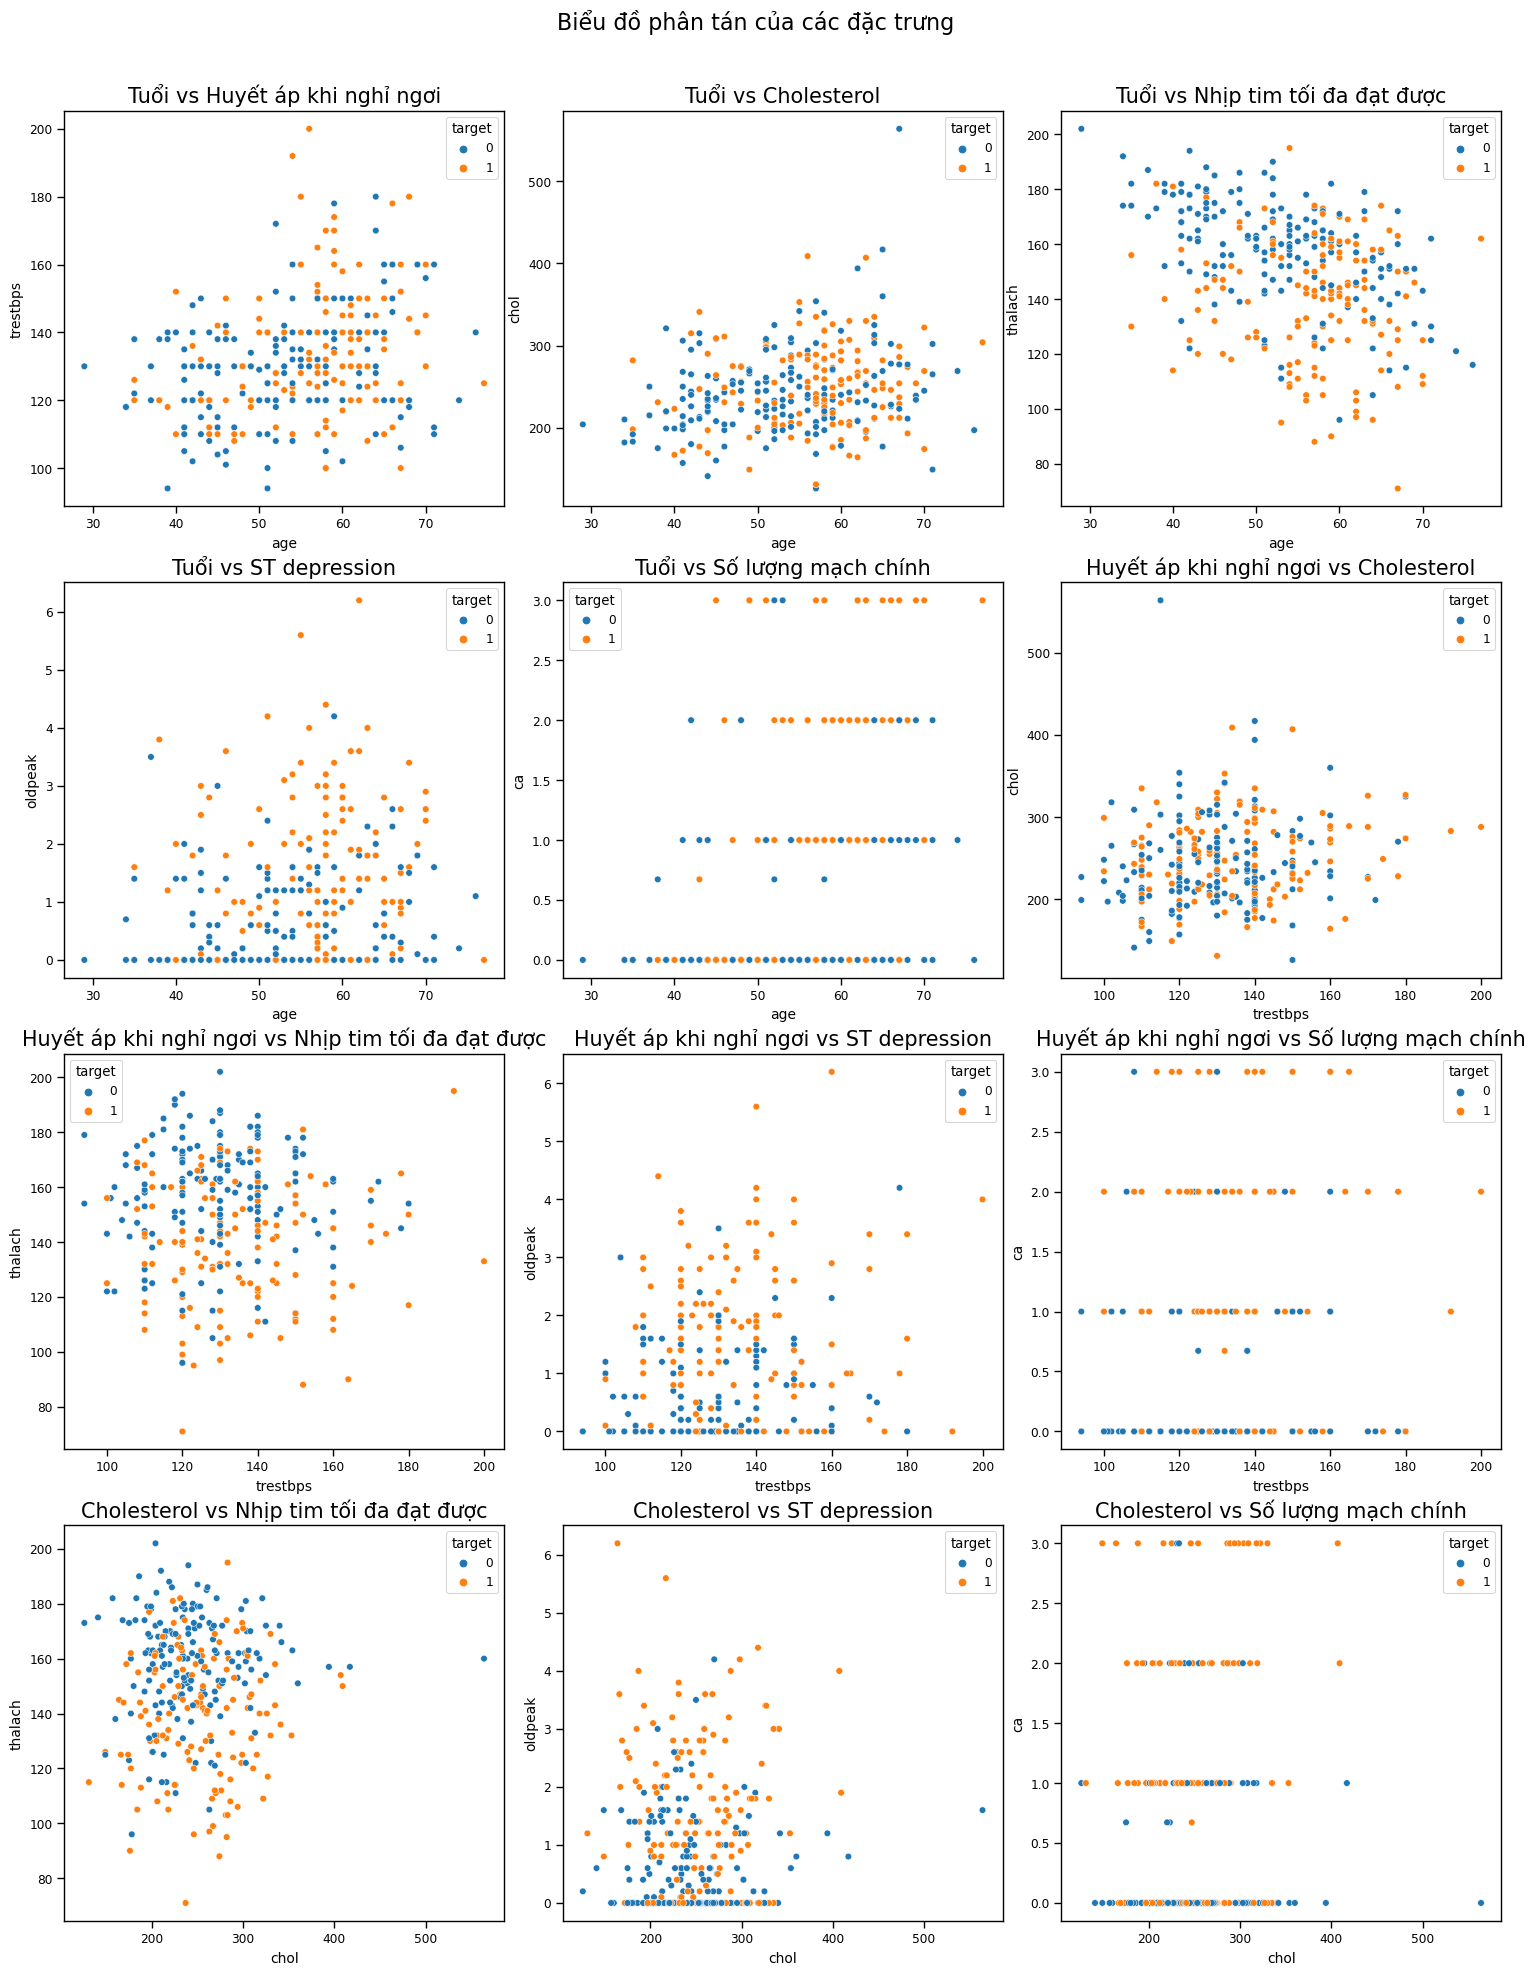

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Biểu đồ phân tán của các đặc trưng', fontsize=16)

sns.scatterplot(x='age', y='trestbps', hue='target', data=df, ax=axes[0, 0]).set_title('Tuổi vs Huyết áp khi nghỉ ngơi')
sns.scatterplot(x='age', y='chol', hue='target', data=df, ax=axes[0, 1]).set_title('Tuổi vs Cholesterol')
sns.scatterplot(x='age', y='thalach', hue='target', data=df, ax=axes[0, 2]).set_title('Tuổi vs Nhịp tim tối đa đạt được')
sns.scatterplot(x='age', y='oldpeak', hue='target', data=df, ax=axes[1, 0]).set_title('Tuổi vs ST depression')
sns.scatterplot(x='age', y='ca', hue='target', data=df, ax=axes[1, 1]).set_title('Tuổi vs Số lượng mạch chính')
sns.scatterplot(x='trestbps', y='chol', hue='target', data=df, ax=axes[1, 2]).set_title('Huyết áp khi nghỉ ngơi vs Cholesterol')
sns.scatterplot(x='trestbps', y='thalach', hue='target', data=df, ax=axes[2, 0]).set_title('Huyết áp khi nghỉ ngơi vs Nhịp tim tối đa đạt được')
sns.scatterplot(x='trestbps', y='oldpeak', hue='target', data=df, ax=axes[2, 1]).set_title('Huyết áp khi nghỉ ngơi vs ST depression')
sns.scatterplot(x='trestbps', y='ca', hue='target', data=df, ax=axes[2, 2]).set_title('Huyết áp khi nghỉ ngơi vs Số lượng mạch chính')
sns.scatterplot(x='chol', y='thalach', hue='target', data=df, ax=axes[3, 0]).set_title('Cholesterol vs Nhịp tim tối đa đạt được')
sns.scatterplot(x='chol', y='oldpeak', hue='target', data=df, ax=axes[3, 1]).set_title('Cholesterol vs ST depression')
sns.scatterplot(x='chol', y='ca', hue='target', data=df, ax=axes[3, 2]).set_title('Cholesterol vs Số lượng mạch chính') 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. Tuổi vs Nhịp tim tối đa đạt được (age vs thalach)
 Nếu nhịp tim tối đa có xu hướng giảm dần theo tuổi, điều này có thể cho thấy rằng người cao tuổi có nhịp tim tối đa thấp hơn, và điều này có thể là một yếu tố nguy cơ của bệnh tim.
2. Huyết áp khi nghỉ ngơi vs Nhịp tim tối đa đạt được (trestbps vs thalach)


3 .Model Building: Sau khi dữ liệu được xử lý, sử dụng dữ liệu này để xây dựng mô hình Học
 máy

In [ ]:
# 1. Tách dữ liệu thành đặc trưng (features) và nhãn (labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#3. Chuẩn hóa dữ liệu (Standardization)
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3.1 Ở đây e sẽ sử dụng các thuật toán KNN, Decision tree, Random forest, Boosting, SVM ,  Naive Bayes, Stacking để xem xét thuật toán nào sẽ cho ra được đồ chính xác cao nhất phù hợp với dự liệu.

In [17]:
#########################################   KNeighborsClassifier   #############################################################
###############################################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
# define the model
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [18]:
#########################################   SVM   #############################################################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))



Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


In [19]:
#########################################   Naive Bayes  #############################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))



Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


In [20]:
#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.75


In [21]:
#########################################  Random Forest  ############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


In [22]:

###############################################################################
# applying Adaboost


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
# define the model
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


In [23]:
###############################################################################
# Gradient Adaboost



X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import GradientBoostingClassifier
# define the model


classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


In [24]:
###############################################################################
# applying XGBoost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Giả sử df đã được định nghĩa và xử lý trước đó
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values  # Convert target variable to integer

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Khởi tạo và huấn luyện mô hình XGBoost
xg = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = xg.predict(X_test)

# Tính toán ma trận nhầm lẫn cho tập kiểm tra
cm_test = confusion_matrix(y_test, y_pred)

# Dự đoán trên tập huấn luyện
y_pred_train = xg.predict(X_train)

# Tính toán ma trận nhầm lẫn cho tập huấn luyện
cm_train = confusion_matrix(y_train, y_pred_train)

# Tính toán độ chính xác
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Giả sử df đã được định nghĩa và xử lý trước đó
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Khởi tạo các mô hình
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Tạo danh sách các mô hình
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]

# Khởi tạo StackingClassifier với XGBClassifier làm final_estimator
classifier = StackingClassifier(estimators=clf, final_estimator=XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100))
classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = classifier.predict(X_test)

# Tính toán ma trận nhầm lẫn cho tập kiểm tra
cm_test = confusion_matrix(y_test, y_pred)

# Dự đoán trên tập huấn luyện
y_pred_train = classifier.predict(X_train)

# Tính toán ma trận nhầm lẫn cho tập huấn luyện
cm_train = confusion_matrix(y_train, y_pred_train)

# Tính toán độ chính xác
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for StackingClassifier = 0.92
Accuracy for test set for StackingClassifier = 0.89


Model Performance: Đánh giá hiệu suất mô hình dựa trên tập dữ liệu kiểm tra